In [1]:
from pybacktestchain_ss.data_module import FirstTwoMoments
from pybacktestchain_ss.broker import Backtest, StopLoss, ProfitTaking
from pybacktestchain_ss.portfolio_strategies import RiskAverseStrategy, MaximumReturnStrategy # and other strategies
from datetime import datetime

# Set verbosity for logging
verbose = False  # Set to True to enable logging, or False to suppress it

INFO:matplotlib.font_manager:generated new fontManager


INFO:root:Running backtest from 2019-01-01 00:00:00 to 2020-01-01 00:00:00.
INFO:root:Retrieving price data for universe


INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
c:\Users\samul\anaconda3\envs\projectenv\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\samul\anaconda3\envs\projectenv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\samul\anaconda3\envs\projectenv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000
INFO:root:Current portfolio value: 1000000

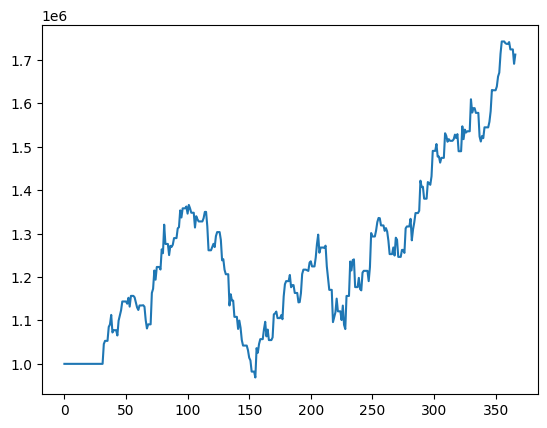

In [2]:
backtest = Backtest(
    initial_date=datetime(2019, 1, 1),
    final_date=datetime(2020, 1, 1),
    universe = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX'],
    initial_cash = 1000000,
    information_class=FirstTwoMoments,
    risk_model=StopLoss,
    risk_threshold=0.1,
    name_blockchain="backtest",
    portfolio_strategy=RiskAverseStrategy,
    verbose=verbose
)

backtest.run_backtest()